In [8]:
import pandas as pd

In [14]:
from google.colab import files
uploaded = files.upload()

Saving pwt110.xlsx to pwt110.xlsx


In [22]:
df_pwt = pd.read_excel("pwt110.xlsx", sheet_name='Data')
print(df_pwt.head())

  countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  \
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN   
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN   

   ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
0  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 51 columns]


Pull the Top 10 and Bottom 10 in average annual RGDPE Change since 1970.

Filter for 1970 onward.

In [27]:
df_pwt = df_pwt[df_pwt['year'] >= 1970]

Sort the dataframe by country and year and then calculate the year-over-year percentage change in rgdpe for each country and store it in a new column.



In [28]:
df_pwt = df_pwt.sort_values(by=['country', 'year'])
df_pwt['rgdpe_yoy_growth'] = df_pwt.groupby('country')['rgdpe'].pct_change() * 100

/tmp/ipython-input-217836251.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pwt['rgdpe_yoy_growth'] = df_pwt.groupby('country')['rgdpe'].pct_change() * 100


Group the DataFrame by by country to calculate the average growth for each country.



In [29]:
grouped_by_country = df_pwt.groupby('country')

Calculate the mean of the 'rgdpe_yoy_growth' column for each country and store it in a new variable named `average_growth_by_country`.



In [30]:
average_growth_by_country = grouped_by_country['rgdpe_yoy_growth'].mean()
display(average_growth_by_country.head())

,rgdpe_yoy_growth
country,
Albania,3.940048
Algeria,4.058547
Angola,4.617744
Anguilla,4.536348
Antigua and Barbuda,4.084702


Sort the average growth rates to identify the top and bottom 10 countries.



In [31]:
bottom_10_countries = average_growth_by_country.sort_values(ascending=True).head(10)
top_10_countries = average_growth_by_country.sort_values(ascending=False).head(10)
print("Bottom 10 countries by average annual rgdpe growth:")
display(bottom_10_countries)
print("\nTop 10 countries by average annual rgdpe growth:")
display(top_10_countries)

Bottom 10 countries by average annual rgdpe growth:


,rgdpe_yoy_growth
country,
Venezuela (Bolivarian Republic of),-0.726445
Ukraine,0.066954
Curaçao,0.169962
Montserrat,0.411303
Republic of Moldova,0.917387
Serbia,0.981019
Tajikistan,1.133938
Kyrgyzstan,1.308903
Latvia,1.498270



Top 10 countries by average annual rgdpe growth:


,rgdpe_yoy_growth
country,
Equatorial Guinea,10.111993
Botswana,8.619228
Qatar,8.170721
Singapore,8.163688
Maldives,8.144757
"China, Macao SAR",8.036826
Turks and Caicos Islands,7.942441
Mongolia,7.292104
Bosnia and Herzegovina,7.224298


Show a comparison of growth rates among prominent countries, i.e. US, UK, Germany, France, Brazil, Russia, India, China, South Africa

In [33]:
prominent_countries = ['United States', 'United Kingdom', 'Germany', 'France', 'Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
prominent_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(prominent_countries)]
print("Average annual rgdpe growth for prominent countries:")
display(prominent_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for prominent countries:


,rgdpe_yoy_growth
country,
China,7.081654
Brazil,5.290160
India,4.961147
Germany,3.620382
France,3.237800
South Africa,3.203306
United States,3.158393
Russian Federation,2.862690
United Kingdom,2.628924


Comparison of NAFTA Countries

In [34]:
nafta_countries = ['Canada', 'Mexico', 'United States']
nafta_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(nafta_countries)]
print("Average annual rgdpe growth for NAFTA countries:")
display(nafta_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for NAFTA countries:


,rgdpe_yoy_growth
country,
Mexico,4.047324
Canada,3.443545
United States,3.158393


Comparison of African Countries

In [36]:
african_countries_list = [country.strip() for country in african_countries.split(',')]
african_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(african_countries_list)]
print("Average annual rgdpe growth for African countries:")
display(african_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for African countries:


,rgdpe_yoy_growth
country,
Equatorial Guinea,10.111993
Botswana,8.619228
Congo,6.668327
Egypt,6.373783
Zimbabwe,6.321765
Gabon,6.231531
Ethiopia,5.561020
Nigeria,5.287090
Cabo Verde,5.155999


Looking at a simple relationship between population and growth.


In [37]:
latest_pop_by_country = df_pwt.groupby('country')['pop'].last()
growth_and_pop = pd.concat([average_growth_by_country, latest_pop_by_country], axis=1)
growth_and_pop.columns = ['average_rgdpe_growth', 'latest_population']
display(growth_and_pop.head())

,average_rgdpe_growth,latest_population
country,,
Albania,3.940048,2.811655
Algeria,4.058547,46.164219
Angola,4.617744,36.749906
Anguilla,4.536348,0.014410
Antigua and Barbuda,4.084702,0.093316


Visualize the relationship between population and average annual growth rate, plotting all countries.



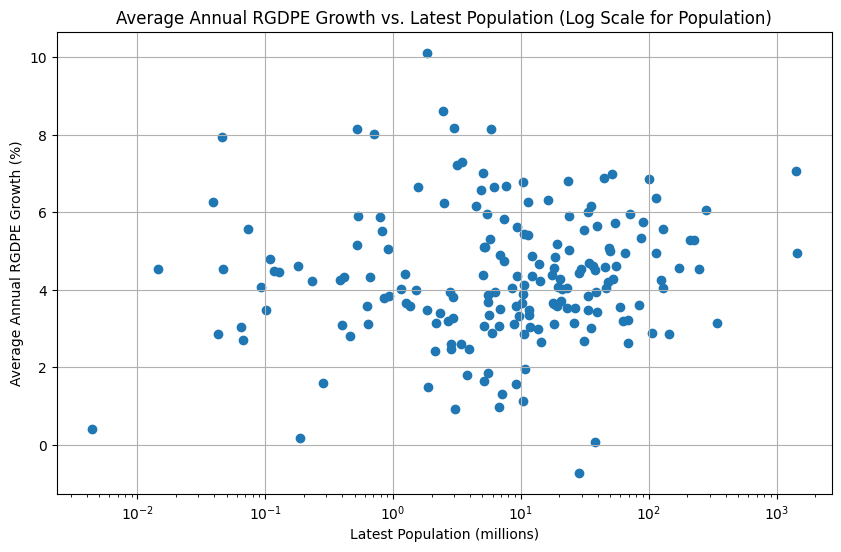

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(growth_and_pop['latest_population'], growth_and_pop['average_rgdpe_growth'])
plt.xlabel('Latest Population (millions)')
plt.xscale('log')
plt.ylabel('Average Annual RGDPE Growth (%)')
plt.title('Average Annual RGDPE Growth vs. Latest Population (Log Scale for Population)')
plt.grid(True)
plt.show()